<a href="https://colab.research.google.com/github/Logesh7-R/DATA_SCIENCE_BASICS/blob/main/intellipat_optimization_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [43]:
x = np.random.rand(100,5)  #input value between o to 1
y = np.random.randint(0,2,size=100) #target value 0 and 1
x,y


(array([[0.22699921, 0.93720934, 0.64030094, 0.46675576, 0.93854369],
        [0.75421721, 0.16818637, 0.85850692, 0.51117973, 0.01233918],
        [0.57643838, 0.47847972, 0.35861936, 0.14005707, 0.73516275],
        [0.80292916, 0.38218558, 0.75930343, 0.12726318, 0.50177326],
        [0.85019712, 0.36253442, 0.66400924, 0.35057298, 0.63771459],
        [0.11519366, 0.75554311, 0.28241003, 0.89758883, 0.46705367],
        [0.61219002, 0.28918242, 0.91213295, 0.08325058, 0.31117381],
        [0.30931302, 0.34932658, 0.5162008 , 0.83888957, 0.58555391],
        [0.55059222, 0.60658885, 0.33086245, 0.97533803, 0.41389791],
        [0.39597535, 0.14838563, 0.31268711, 0.41072385, 0.08606998],
        [0.24165768, 0.06457922, 0.86758639, 0.43222886, 0.61719346],
        [0.19195788, 0.37773536, 0.29407098, 0.14151512, 0.19206837],
        [0.0530399 , 0.23289583, 0.8016544 , 0.38826629, 0.24730998],
        [0.68954469, 0.51380869, 0.80283004, 0.22927023, 0.35349259],
        [0.56632812,

In [44]:
#model with 10 hidden layer and 1 output layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_dim=5,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [45]:
# lists to store optimizer loss separately
loss_sgd = []
loss_adagrad = []
loss_adam = []

In [48]:
for opt_name in ['SGD','Adagrad','Adam']:
  if opt_name == 'SGD':
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
  elif opt_name == 'Adagrad':
    optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001)
  else:
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
  model.compile(optimizer=optimizer,loss='binary_crossentropy')
  history = model.fit(x,y,epochs=10,verbose=0)

  loss_values = history.history['loss']
  if opt_name == 'SGD':
    loss_sgd = loss_values
  elif opt_name == 'Adagrad':
    loss_adagrad = loss_values
  else:
    loss_adam = loss_values


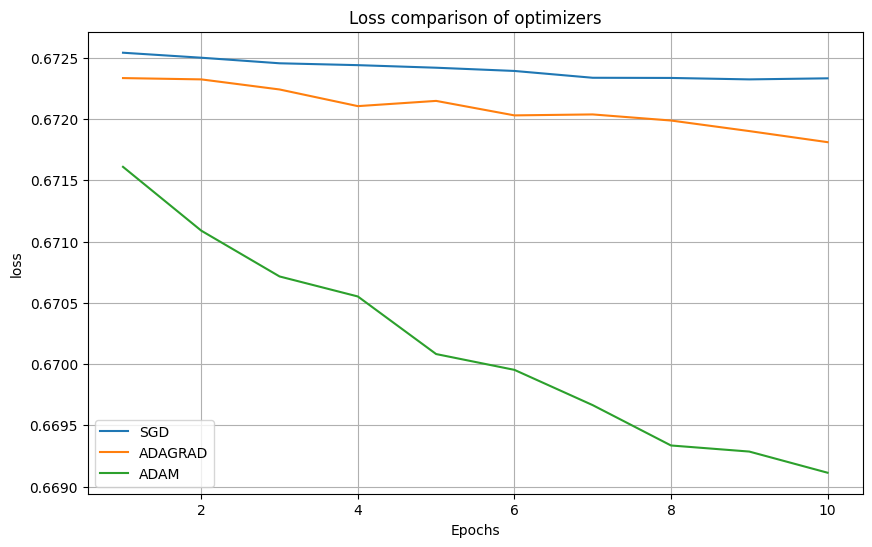

In [49]:
epochs = np.arange(1,11)
plt.figure(figsize=(10,6))
plt.plot(epochs,loss_sgd,label="SGD")
plt.plot(epochs,loss_adagrad,label="ADAGRAD")
plt.plot(epochs,loss_adam,label="ADAM")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss comparison of optimizers")
plt.grid(True)
plt.show()